<a href="https://www.kaggle.com/code/abdazeem/license-plate-recognition-test?scriptVersionId=207909154" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Installing Libaries

In [1]:
!pip install paddleocr paddlepaddle
!pip install ultralytics
!pip install opencv-python-headless


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.7/544.7 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 89.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114248 sha256=afae39b3765d02403a64ffd4ee14534aed084e88d0da4347b72c3618afa0eb9d
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire
  Attempting uninstall: scikit-le

# Import Libraries

In [2]:
import cv2
import numpy as np
import csv
from paddleocr import PaddleOCR
from ultralytics import YOLO
from PIL import Image
from datetime import datetime
import matplotlib.pyplot as plt

# Initialize OCR and YOLO model
ocr = PaddleOCR(use_angle_cls=True, lang='en')
model = YOLO('/kaggle/input/yolo-vlpr/other/vehicle-and-license-plate-detector/2/best.torchscript')  # Replace with your model path


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:16<00:00, 234.85it/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:18<00:00, 537.35it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:16<00:00, 131.94it/s]

[2024/11/17 08:36:34] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


# CLAHE & OCR Function with Preprocessing

In [3]:
def advanced_preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize to increase clarity
    resized_image = cv2.resize(gray, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_LINEAR)

    # Apply CLAHE for better contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(resized_image)

    # Denoise using fastNlMeansDenoising
    denoised_image = cv2.fastNlMeansDenoising(enhanced_image, None, 30, 7, 21)

    # Apply Unsharp Mask to enhance sharpness
    gaussian_blur = cv2.GaussianBlur(denoised_image, (9, 9), 2)
    sharp_image = cv2.addWeighted(denoised_image, 1.5, gaussian_blur, -0.5, 0)

    # Thresholding for clean binary image
    _, binary_image = cv2.threshold(sharp_image, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binary_image


In [4]:
def filter_plate_text(text_boxes):
    # Filter based on aspect ratio and text length
    filtered_text = []
    for text in text_boxes:
        if len(text) >= 4:  # Ensuring it's a valid plate number length
            filtered_text.append(text)
    return filtered_text if filtered_text else ["Uncertain Plate Number"]


In [5]:
def perform_ocr_on_image(image):
    try:
        # Apply advanced preprocessing
        preprocessed_image = advanced_preprocess_image(image)
        pil_image = Image.fromarray(preprocessed_image)

        # Perform OCR using PaddleOCR
        ocr_results = ocr.ocr(np.array(pil_image), cls=True)

        # Check if OCR returned any results
        if not ocr_results or len(ocr_results[0]) == 0:
            return ["License plate not visible"]

        extracted_text = []
        for region in ocr_results:
            try:
                for line in region:
                    text = line[1][0]
                    if len(text) > 0:
                        extracted_text.append(text)
            except (IndexError, TypeError):
                continue

        # Apply text filtering to refine results
        return filter_plate_text(extracted_text)

    except Exception as e:
        print(f"OCR error: {str(e)}")
        return ["Error during OCR processing"]


# Car Color Detection Function

In [6]:
# Detect the dominant color of the car
def detect_car_color(image):
    # Convert to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])
    dominant_color = np.argmax(hist)
    
    # Color determination based on the dominant hue
    if 0 <= dominant_color <= 10 or 160 <= dominant_color <= 180:
        color = 'Red'
    elif 10 < dominant_color <= 35:
        color = 'Yellow'
    elif 35 < dominant_color <= 85:
        color = 'Green'
    elif 85 < dominant_color <= 125:
        color = 'Blue'
    else:
        color = 'Unknown'
    
    return color


#  Running the Model on Test Images

Loading /kaggle/input/yolo-vlpr/other/vehicle-and-license-plate-detector/2/best.torchscript for TorchScript inference...

image 1/1 /kaggle/input/my-ocr-test-image/234_jpg.rf.27a07f0f103f5e5c3b9279e5175326c6.jpg: 640x640 1 Car, 1 License Plate, 7.4ms
Speed: 9.6ms preprocess, 7.4ms inference, 301.8ms postprocess per image at shape (1, 3, 640, 640)
[2024/11/17 08:36:43] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.5114836692810059
[2024/11/17 08:36:43] ppocr DEBUG: cls num  : 3, elapsed : 0.026066303253173828
[2024/11/17 08:36:43] ppocr DEBUG: rec_res num  : 3, elapsed : 0.10268473625183105
Image: /kaggle/input/my-ocr-test-image/234_jpg.rf.27a07f0f103f5e5c3b9279e5175326c6.jpg, License Plate: ['E550', 'ABC-11ZKH'], Car Color: Yellow


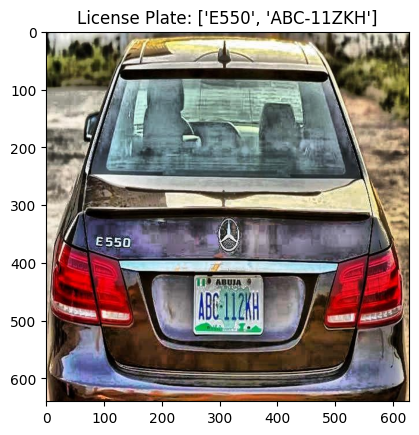

[2024/11/17 08:36:44] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.08443427085876465
[2024/11/17 08:36:44] ppocr DEBUG: cls num  : 1, elapsed : 0.023547649383544922
[2024/11/17 08:36:44] ppocr DEBUG: rec_res num  : 1, elapsed : 0.06685805320739746
Image: /kaggle/input/my-ocr-test-image/234_jpg.rf.27a07f0f103f5e5c3b9279e5175326c6.jpg, License Plate: ['ABC-112KH'], Car Color: Yellow


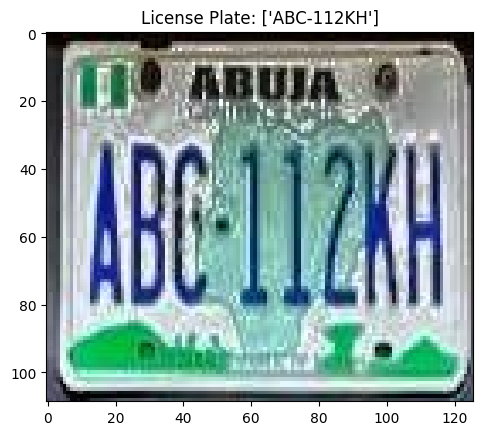


image 1/1 /kaggle/input/my-ocr-test-image/WhatsApp Image 2024-10-23 at 12.41.59_61a055d4.jpg: 640x640 1 Car, 1 License Plate, 7.3ms
Speed: 2.1ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
[2024/11/17 08:36:47] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.23110127449035645
[2024/11/17 08:36:47] ppocr DEBUG: cls num  : 3, elapsed : 0.010972738265991211
[2024/11/17 08:36:47] ppocr DEBUG: rec_res num  : 3, elapsed : 0.349689245223999
Image: /kaggle/input/my-ocr-test-image/WhatsApp Image 2024-10-23 at 12.41.59_61a055d4.jpg, License Plate: ['JSS FREMON1', 'L SD-360HB', 'fremont toyuta'], Car Color: Blue


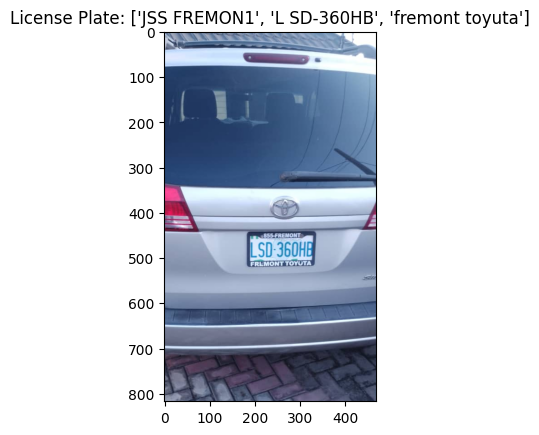

[2024/11/17 08:36:48] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.08677268028259277
[2024/11/17 08:36:48] ppocr DEBUG: cls num  : 3, elapsed : 0.009867429733276367
[2024/11/17 08:36:48] ppocr DEBUG: rec_res num  : 3, elapsed : 0.5116250514984131
Image: /kaggle/input/my-ocr-test-image/WhatsApp Image 2024-10-23 at 12.41.59_61a055d4.jpg, License Plate: ['55F.EMONT', ' SD-360HB', 'fRemont toyuta'], Car Color: Blue


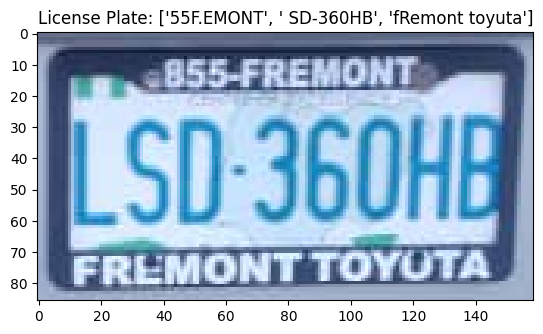


image 1/1 /kaggle/input/my-ocr-test-image/car_t.jpg: 640x640 1 Car, 1 License Plate, 7.3ms
Speed: 2.1ms preprocess, 7.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
[2024/11/17 08:36:49] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.30173277854919434
[2024/11/17 08:36:49] ppocr DEBUG: cls num  : 1, elapsed : 0.00791621208190918
[2024/11/17 08:36:50] ppocr DEBUG: rec_res num  : 1, elapsed : 0.04456686973571777
Image: /kaggle/input/my-ocr-test-image/car_t.jpg, License Plate: ['APP 86HD'], Car Color: Yellow


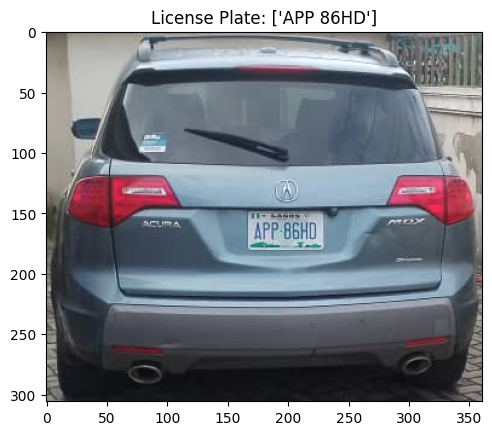

[2024/11/17 08:36:50] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.055002450942993164
[2024/11/17 08:36:50] ppocr DEBUG: cls num  : 1, elapsed : 0.007174015045166016
[2024/11/17 08:36:50] ppocr DEBUG: rec_res num  : 1, elapsed : 0.04422783851623535
Image: /kaggle/input/my-ocr-test-image/car_t.jpg, License Plate: ['APP 86HO'], Car Color: Yellow


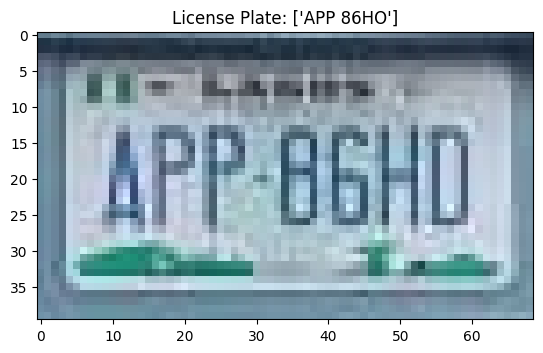


image 1/1 /kaggle/input/my-ocr-test-image/444_jpg.rf.c2766558d2fcb353d013b6f8269ac17f.jpg: 640x640 3 Cars, 1 License Plate, 7.3ms
Speed: 1.6ms preprocess, 7.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
[2024/11/17 08:36:53] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.34166455268859863
[2024/11/17 08:36:53] ppocr DEBUG: cls num  : 4, elapsed : 0.03267335891723633
[2024/11/17 08:36:53] ppocr DEBUG: rec_res num  : 4, elapsed : 0.17162156105041504
Image: /kaggle/input/my-ocr-test-image/444_jpg.rf.c2766558d2fcb353d013b6f8269ac17f.jpg, License Plate: ['LSR-5HP', '$ AYnA '], Car Color: Red


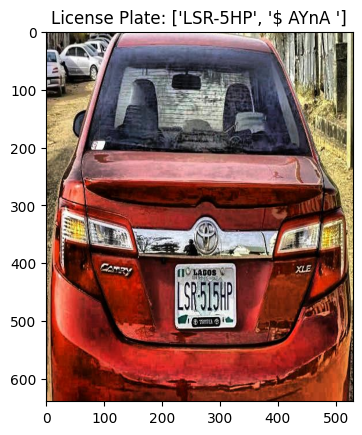

[2024/11/17 08:36:54] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.09694504737854004
[2024/11/17 08:36:54] ppocr DEBUG: cls num  : 3, elapsed : 0.010684967041015625
[2024/11/17 08:36:54] ppocr DEBUG: rec_res num  : 3, elapsed : 0.11905550956726074
Image: /kaggle/input/my-ocr-test-image/444_jpg.rf.c2766558d2fcb353d013b6f8269ac17f.jpg, License Plate: ['LSR-515HP'], Car Color: Red


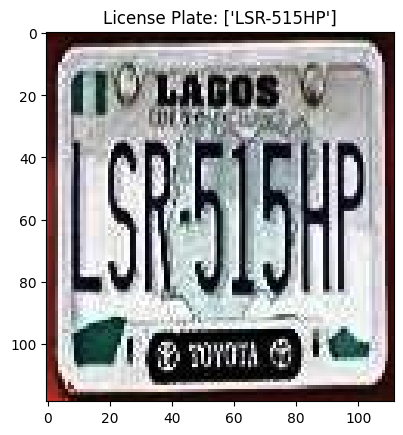

[2024/11/17 08:36:54] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.06818723678588867
[2024/11/17 08:36:54] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/11/17 08:36:54] ppocr DEBUG: rec_res num  : 0, elapsed : 2.86102294921875e-06
OCR error: object of type 'NoneType' has no len()
Image: /kaggle/input/my-ocr-test-image/444_jpg.rf.c2766558d2fcb353d013b6f8269ac17f.jpg, License Plate: ['Error during OCR processing'], Car Color: Red


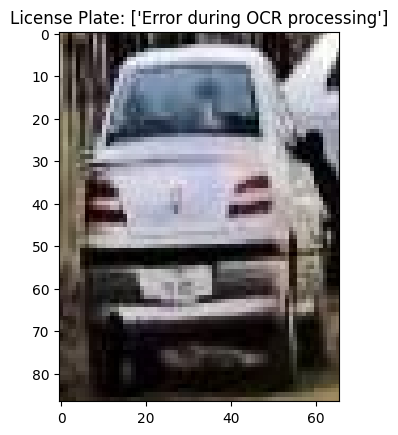

[2024/11/17 08:36:55] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.06577467918395996
[2024/11/17 08:36:55] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/11/17 08:36:55] ppocr DEBUG: rec_res num  : 0, elapsed : 2.1457672119140625e-06
OCR error: object of type 'NoneType' has no len()
Image: /kaggle/input/my-ocr-test-image/444_jpg.rf.c2766558d2fcb353d013b6f8269ac17f.jpg, License Plate: ['Error during OCR processing'], Car Color: Red


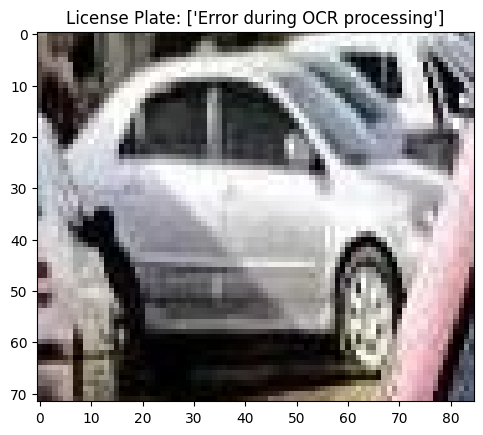

In [7]:
# Path to your 4 test images
test_images = ['/kaggle/input/my-ocr-test-image/234_jpg.rf.27a07f0f103f5e5c3b9279e5175326c6.jpg',
              '/kaggle/input/my-ocr-test-image/WhatsApp Image 2024-10-23 at 12.41.59_61a055d4.jpg',
              '/kaggle/input/my-ocr-test-image/car_t.jpg',
              '/kaggle/input/my-ocr-test-image/444_jpg.rf.c2766558d2fcb353d013b6f8269ac17f.jpg'] 

results = []

for img_path in test_images:
    # Read image
    image = cv2.imread(img_path)
    
    # Run YOLO detection
    detections = model(img_path)
    
    # Process each detected region (assuming first region is the license plate)
    for result in detections:
        for box in result.boxes.xyxy:  # Extract bounding boxes
            x1, y1, x2, y2 = map(int, box)
            license_plate_img = image[y1:y2, x1:x2]
            
            # OCR on the cropped license plate
            ocr_text = perform_ocr_on_image(license_plate_img)
            
            # Car color detection
            car_color = detect_car_color(image)
            
            # Log results
            results.append({
                'image': img_path,
                'license_plate_text': ocr_text,
                'car_color': car_color
            })
            
            # Display results
            print(f"Image: {img_path}, License Plate: {ocr_text}, Car Color: {car_color}")
            plt.imshow(cv2.cvtColor(license_plate_img, cv2.COLOR_BGR2RGB))
            plt.title(f"License Plate: {ocr_text}")
            plt.show()

# Saving to a csv file

In [8]:
# Save to CSV
with open('car_detection_results.csv', 'w', newline='') as csvfile:
    fieldnames = ['image', 'license_plate_text', 'car_color']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for entry in results:
        writer.writerow(entry)